In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from regressors import stats
import seaborn as sns

In [2]:
#reading the data
data = pd.read_csv("Startups.csv")

In [3]:
#check the first five values
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#check bottom five values
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,NaN,135426.92,NaN,California,42559.73
48,542.05,51743.15,NaN,New York,35673.41
49,NaN,116983.80,45173.06,California,14681.40


In [5]:
#statastical analysis
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,48.000000,50.000000,47.000000,50.000000
mean,76793.349583,121344.639600,224494.784894,112012.639200
std,44224.086236,28017.802755,113316.503936,40306.180338
min,542.050000,51283.140000,1903.930000,14681.400000
25%,45528.002500,103730.875000,139268.715000,90138.902500
50%,74661.715000,122699.795000,229160.950000,107978.190000
75%,105065.712500,144842.180000,301528.275000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
#checkin null values
data.isnull().sum()

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Profit             0
dtype: int64

In [7]:
#drop null values
data[data['R&D Spend'].isna()]
data=data.dropna()
data=data.reset_index(drop=True)

In [8]:
#check null values
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
#check dtypes of variables
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


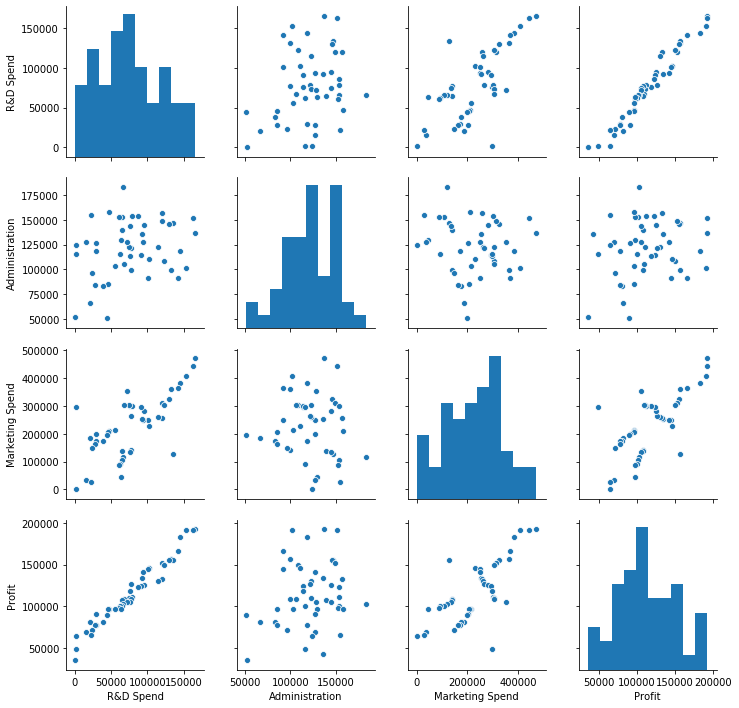

In [12]:
sns.pairplot(data)

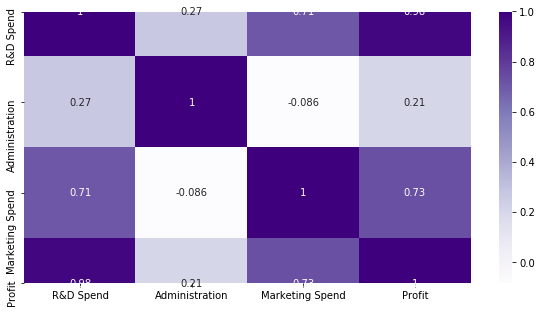

In [14]:
#coeffiient corelation of varibales
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap='Purples')

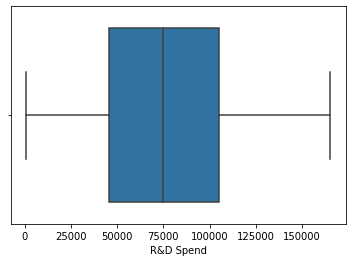

In [4]:
#check the outliers
sns.boxplot('R&D Spend',data=data)

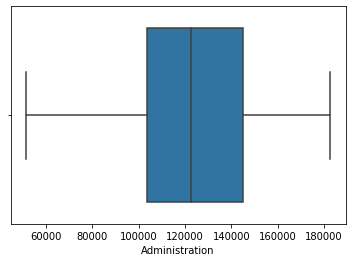

In [5]:
sns.boxplot('Administration',data=data)

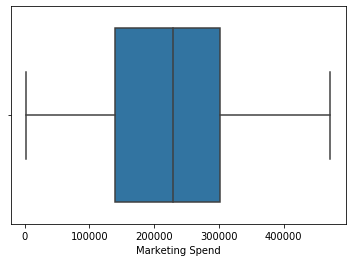

In [6]:
sns.boxplot('Marketing Spend',data=data)

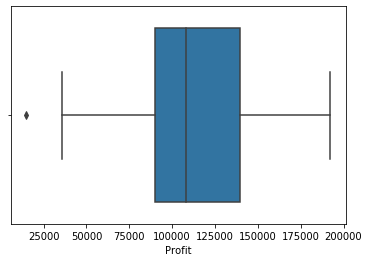

In [8]:
sns.boxplot('Profit',data=data)

In [9]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [11]:
data = remove_outlier(data,"Profit")

# 'state' variable has in object we need to convert it to int using labelencoder

In [10]:
#converting object to integer value
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
State=le.fit_transform(data['State'])
data['State']=State

In [11]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State                int32
Profit             float64
dtype: object

In [12]:
#separting independent and dependent variable to x and y
x = data.iloc[:,:-1]
y = data['Profit']

In [13]:
#splitting x and y data to test and train
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
#fitting training data to the model
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#getting co-effictient values(m in y=mx+c)
coeff_data = pd.DataFrame(regressor.coef_,x.columns,columns=['coefficient'])
coeff_data

,coefficient
R&D Spend,0.768780
Administration,-0.039898
Marketing Spend,0.020199
State,-432.371932


In [16]:
#getting intercept value(c in y=mx+c)
regressor.intercept_

57936.50698030049

In [17]:
#predicting the values on x_test
y_predict = regressor.predict(x_test)

In [18]:
#finding resudial sum of square
print("Residual sum of square :%0.2f"%((y_predict-y_test)**2).sum())

Residual sum of square :313832609.04


In [19]:
#to get acuuracy
regressor.score(x,y)

0.9607601435429819

In [20]:
#to analysis the model 
feature_names = list(x.columns.values)

In [21]:
stats.summary(regressor,x,y,feature_names)

Residuals:
        Min         1Q     Median         3Q         Max
-12174.7205 -5128.1289  2365.7972  4816.5691  16046.7797


Coefficients:
                     Estimate   Std. Error  t value   p value
_intercept       57936.506980  5739.120113  10.0950  0.000000
R&D Spend            0.768780     0.034140  22.5183  0.000000
Administration      -0.039898     0.016861  -2.3662  0.022336
Marketing Spend      0.020199     0.008269   2.4427  0.018568
State             -432.371932  1292.195225  -0.3346  0.739479
---
R-squared:  0.96076,    Adjusted R-squared:  0.95693
F-statistic: 250.96 on 4 features


**from summary we can analysis that 'state'has a p value greater than 0.05 so we will drop it and fit the data**

In [22]:
#checking for outlier and removing state columns

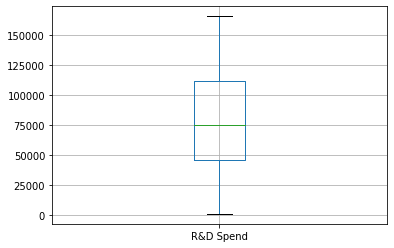

In [23]:
data.boxplot(['R&D Spend'])

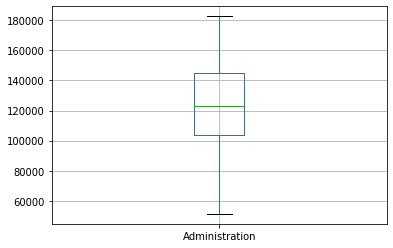

In [24]:
data.boxplot(['Administration'])

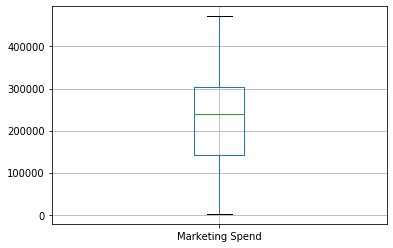

In [25]:
data.boxplot(['Marketing Spend'])

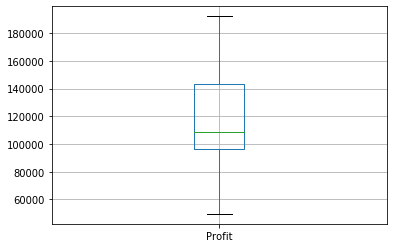

In [26]:
data.boxplot(['Profit'])

In [27]:
#separting independent and dependent variable to x and y
x = data.iloc[:,:-2]
y = data['Profit']
x.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend'], dtype='object')

In [28]:
#splitting x and y data to test and train
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
#fitting training data to the model
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
#getting co-effictient values(m in y=mx+c)
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
R&D Spend,0.768169
Administration,-0.039212
Marketing Spend,0.020082


In [31]:
regressor.intercept_

57494.81491224035

In [32]:
#predicting the values on x_test
y_pred = regressor.predict(x_test)

In [40]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
r2

0.9415459202594516

In [34]:
#finding resudial sum of square
print("Residual sum of squares: %.2f"% ((y_pred - y_test) ** 2).sum())

Residual sum of squares: 325678877.53


In [35]:
#to get acuuracy
regressor.score(x,y)

0.9604740314289811

In [36]:
#to analysis the model
feature_names = list(x.columns.values)

In [37]:
stats.summary(regressor, x, y, feature_names)

Residuals:
        Min         1Q     Median         3Q         Max
-12137.8574 -5287.4812  2542.9658  4775.8333  16041.6204


Coefficients:
                     Estimate   Std. Error  t value   p value
_intercept       57494.814912  5723.487218  10.0454  0.000000
R&D Spend            0.768169     0.034264  22.4188  0.000000
Administration      -0.039212     0.016923  -2.3171  0.025106
Marketing Spend      0.020082     0.008299   2.4198  0.019632
---
R-squared:  0.96047,    Adjusted R-squared:  0.95765
F-statistic: 340.20 on 3 features
